In [86]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

%matplotlib inline


from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [87]:
NSD = yf.Ticker('NQ=F')

df = NSD.history(start='2020-01-01', end='2021-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,8776.75,8901.50,8769.50,8891.75,416637,0.0,0.0
2020-01-03 00:00:00-05:00,8895.50,8907.25,8735.25,8810.00,599887,0.0,0.0
2020-01-06 00:00:00-05:00,8772.25,8873.00,8723.00,8847.50,469514,0.0,0.0
2020-01-07 00:00:00-05:00,8853.25,8894.75,8825.75,8853.00,510004,0.0,0.0
2020-01-08 00:00:00-05:00,8841.50,8972.25,8678.00,8944.50,723085,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,12660.75,12724.00,12631.50,12704.50,173464,0.0,0.0
2020-12-28 00:00:00-05:00,12676.25,12855.50,12655.25,12832.75,346691,0.0,0.0
2020-12-29 00:00:00-05:00,12845.25,12918.25,12808.25,12841.00,393995,0.0,0.0


In [88]:
df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
print(df[['Close', 'ADX']])

                              Close        ADX
Date                                          
2020-01-02 00:00:00-05:00   8891.75        NaN
2020-01-03 00:00:00-05:00   8810.00        NaN
2020-01-06 00:00:00-05:00   8847.50        NaN
2020-01-07 00:00:00-05:00   8853.00        NaN
2020-01-08 00:00:00-05:00   8944.50        NaN
...                             ...        ...
2020-12-24 00:00:00-05:00  12704.50  20.105484
2020-12-28 00:00:00-05:00  12832.75  20.214894
2020-12-29 00:00:00-05:00  12841.00  20.631430
2020-12-30 00:00:00-05:00  12841.50  21.018214
2020-12-31 00:00:00-05:00  12885.50  21.158134

[253 rows x 2 columns]


In [89]:
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
df[['Close', 'RSI']]

,Close,RSI
Date,,
2020-01-02 00:00:00-05:00,8891.75,NaN
2020-01-03 00:00:00-05:00,8810.00,NaN
2020-01-06 00:00:00-05:00,8847.50,NaN
2020-01-07 00:00:00-05:00,8853.00,NaN
2020-01-08 00:00:00-05:00,8944.50,NaN
...,...,...
2020-12-24 00:00:00-05:00,12704.50,62.969452
2020-12-28 00:00:00-05:00,12832.75,66.731279
2020-12-29 00:00:00-05:00,12841.00,66.963772


In [90]:
df['%K'], df['%D'] = ta.STOCH(df['High'], df['Low'], df['Close'],
                              fastk_period=14, slowk_period=3, slowk_matype=0,
                              slowd_period=3, slowd_matype=0)

df[['Close', '%K', '%D']]

,Close,%K,%D
Date,,,
2020-01-02 00:00:00-05:00,8891.75,NaN,NaN
2020-01-03 00:00:00-05:00,8810.00,NaN,NaN
2020-01-06 00:00:00-05:00,8847.50,NaN,NaN
2020-01-07 00:00:00-05:00,8853.00,NaN,NaN
2020-01-08 00:00:00-05:00,8944.50,NaN,NaN
...,...,...,...
2020-12-24 00:00:00-05:00,12704.50,77.773185,79.735604
2020-12-28 00:00:00-05:00,12832.75,82.811644,79.066837
2020-12-29 00:00:00-05:00,12841.00,88.599795,83.061541


In [91]:
df['Elder_Force'] = (df['Close'] - df['Close'].shift(1)) * df['Volume']
print(df[['Close', 'Volume', 'Elder_Force']])

                              Close  Volume  Elder_Force
Date                                                    
2020-01-02 00:00:00-05:00   8891.75  416637          NaN
2020-01-03 00:00:00-05:00   8810.00  599887 -49040762.25
2020-01-06 00:00:00-05:00   8847.50  469514  17606775.00
2020-01-07 00:00:00-05:00   8853.00  510004   2805022.00
2020-01-08 00:00:00-05:00   8944.50  723085  66162277.50
...                             ...     ...          ...
2020-12-24 00:00:00-05:00  12704.50  173464   9236958.00
2020-12-28 00:00:00-05:00  12832.75  346691  44463120.75
2020-12-29 00:00:00-05:00  12841.00  393995   3250458.75
2020-12-30 00:00:00-05:00  12841.50  334304    167152.00
2020-12-31 00:00:00-05:00  12885.50  280573  12345212.00

[253 rows x 3 columns]


In [92]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['STD_20'] = df['Close'].rolling(window=20).std()
df['Banda_Superior'] = df['SMA_20'] + (df['STD_20'] * 2)
df['Banda_Inferior'] = df['SMA_20'] - (df['STD_20'] * 2)
print(df[['Close', 'SMA_20', 'Banda_Superior', 'Banda_Inferior']])

                              Close        SMA_20  Banda_Superior  \
Date                                                                
2020-01-02 00:00:00-05:00   8891.75           NaN             NaN   
2020-01-03 00:00:00-05:00   8810.00           NaN             NaN   
2020-01-06 00:00:00-05:00   8847.50           NaN             NaN   
2020-01-07 00:00:00-05:00   8853.00           NaN             NaN   
2020-01-08 00:00:00-05:00   8944.50           NaN             NaN   
...                             ...           ...             ...   
2020-12-24 00:00:00-05:00  12704.50  12540.677979    12861.163929   
2020-12-28 00:00:00-05:00  12832.75  12569.440479    12886.150235   
2020-12-29 00:00:00-05:00  12841.00  12597.640479    12905.012162   
2020-12-30 00:00:00-05:00  12841.50  12617.102979    12934.831999   
2020-12-31 00:00:00-05:00  12885.50  12638.665479    12968.174766   

                           Banda_Inferior  
Date                                       
2020-01-02 00:

In [93]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
ticket = 'AAPL'
data = yf.download(ticket, start='2020-01-01', end='2021-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.796028,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088303,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662704,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.320969,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.484344,75.797501,76.110001,74.290001,74.290001,132079200


In [95]:
data['Dias'] = (df.index - df.index[0]).days
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Dias
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2020-01-02 00:00:00+00:00,72.796028,75.087502,75.150002,73.797501,74.059998,135480400,0
2020-01-03 00:00:00+00:00,72.088303,74.357498,75.144997,74.125000,74.287498,146322800,1
2020-01-06 00:00:00+00:00,72.662704,74.949997,74.989998,73.187500,73.447502,118387200,4
2020-01-07 00:00:00+00:00,72.320969,74.597504,75.224998,74.370003,74.959999,108872000,5
2020-01-08 00:00:00+00:00,73.484344,75.797501,76.110001,74.290001,74.290001,132079200,6


In [96]:
X = data[['Dias']]
y = data['Close']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [98]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [99]:
predicciones = modelo.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

In [101]:
print(f'Error Cuadrático Medio: {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio: 89.20685850153434
Coeficiente de Determinación (R^2): 0.8063635270149456


In [102]:
# Mostrar primeras filas con predicciones
data['Prediccion'] = modelo.predict(X)
print(data[['Close', 'Prediccion']])

Price                           Close  Prediccion
Ticker                           AAPL            
Date                                             
2020-01-02 00:00:00+00:00   75.087502   61.864962
2020-01-03 00:00:00+00:00   74.357498   62.048198
2020-01-06 00:00:00+00:00   74.949997   62.597904
2020-01-07 00:00:00+00:00   74.597504   62.781139
2020-01-08 00:00:00+00:00   75.797501   62.964375
...                               ...         ...
2020-12-24 00:00:00+00:00  131.970001  127.280009
2020-12-28 00:00:00+00:00  136.690002  128.012950
2020-12-29 00:00:00+00:00  134.869995  128.196186
2020-12-30 00:00:00+00:00  133.720001  128.379421
2020-12-31 00:00:00+00:00  132.690002  128.562656

[253 rows x 2 columns]


In [103]:
# Construcción de Señales de Trading
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
df = yf.Ticker('NQ=F')

df = df.history(start='2015-01-01', end='2024-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,4240.25,4272.75,4201.00,4214.25,229555,0.0,0.0
2015-01-05 00:00:00-05:00,4216.00,4220.75,4145.00,4161.75,313771,0.0,0.0
2015-01-06 00:00:00-05:00,4166.50,4172.50,4082.00,4102.25,426154,0.0,0.0
2015-01-07 00:00:00-05:00,4105.50,4163.25,4102.75,4151.50,328184,0.0,0.0
2015-01-08 00:00:00-05:00,4152.25,4242.75,4152.25,4232.25,272056,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,16956.00,17041.50,16891.50,16980.00,486853,0.0,0.0
2023-12-26 00:00:00-05:00,16964.50,17111.25,16964.50,17083.50,292090,0.0,0.0
2023-12-27 00:00:00-05:00,17090.25,17133.00,17055.50,17113.25,424302,0.0,0.0


In [104]:
# Calcular indicadores
df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)
df['SMA_200'] = ta.SMA(df['Close'], timeperiod=200)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

# Definir reglas de entrada y salida
df['Signal'] = 0
df.loc[(df['RSI'] < 30) & (df['SMA_50'] > df['SMA_200']), 'Signal'] = 1  # Compra
df.loc[(df['RSI'] > 70) & (df['SMA_50'] < df['SMA_200']), 'Signal'] = -1  # Venta




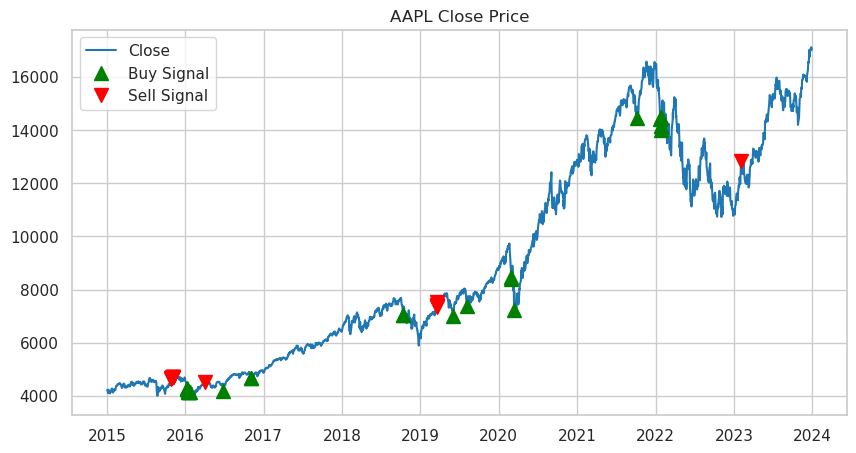

In [105]:

# graficar en un grafico de precios los puntos de compra y venta
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close')
plt.plot(df.loc[df['Signal'] == 1, 'Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df.loc[df['Signal'] == -1, 'Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('AAPL Close Price')
plt.legend()
plt.show()


In [106]:
# Indicadores Combinados
df['SMA_10'] = ta.SMA(df['Close'].values, timeperiod=10)
df['EMA_12'] = ta.EMA(df['Close'].values, timeperiod=12)
df['EMA_26'] = ta.EMA(df['Close'].values, timeperiod=26)
df['SMA_50'] = ta.SMA(df['Close'].values, timeperiod=50)

df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Signal'] = 0  # Inicializamos las señales a 0
df.loc[(df['SMA_10'] > df['SMA_50']) & (df['ATR'] < 2), 'Signal'] = 1


# Señales Basadas en Patrones de Velas
df['Doji'] = ((df['Close'] - df['Open']).abs() < (df['High'] - df['Low']) * 0.1).astype(int)
df.loc[(df['Doji'] == 1) & (df['RSI'] < 30), 'Signal'] = 1  # Comprar cuando se forma un Doji en condiciones de sobreventa


# Contratendencia
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['Signal'] = 0  # Inicializamos las señales a 0
df.loc[df['MACD'] > df['Signal_Line'], 'Signal'] = 1 # Compra cuando MACD > Línea de señal

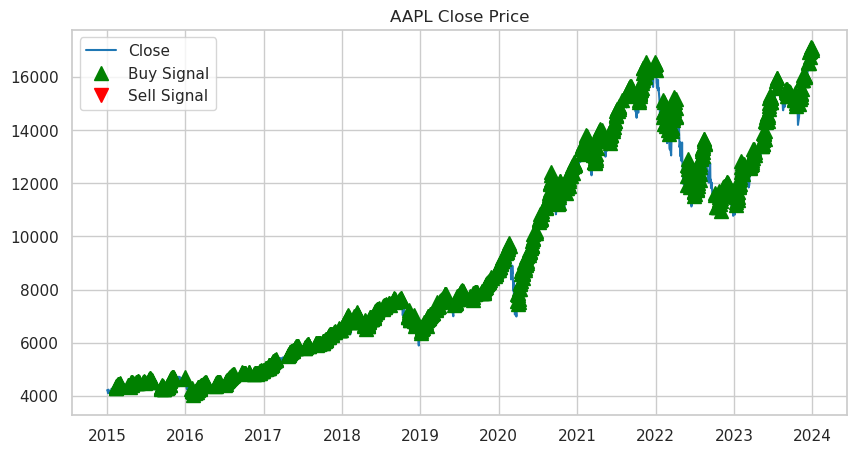

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close')
plt.plot(df.loc[df['Signal'] == 1, 'Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df.loc[df['Signal'] == -1, 'Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('AAPL Close Price')
plt.legend()
plt.show()


In [108]:
# Construcción de Señales de Trading
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
df = yf.Ticker('NQ=F')

df = df.history(start='2015-01-01', end='2024-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,4240.25,4272.75,4201.00,4214.25,229555,0.0,0.0
2015-01-05 00:00:00-05:00,4216.00,4220.75,4145.00,4161.75,313771,0.0,0.0
2015-01-06 00:00:00-05:00,4166.50,4172.50,4082.00,4102.25,426154,0.0,0.0
2015-01-07 00:00:00-05:00,4105.50,4163.25,4102.75,4151.50,328184,0.0,0.0
2015-01-08 00:00:00-05:00,4152.25,4242.75,4152.25,4232.25,272056,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,16956.00,17041.50,16891.50,16980.00,486853,0.0,0.0
2023-12-26 00:00:00-05:00,16964.50,17111.25,16964.50,17083.50,292090,0.0,0.0
2023-12-27 00:00:00-05:00,17090.25,17133.00,17055.50,17113.25,424302,0.0,0.0


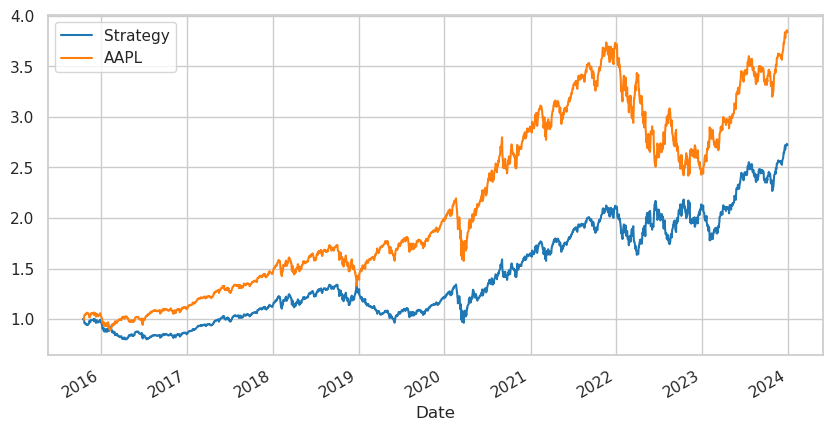

In [109]:
# Descargar datos históricos

# Calcular medias móviles
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Definir reglas de entrada y salida
df['Signal'] = 0
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # Compra 
df.loc[df['SMA_50'] < df['SMA_200'], 'Signal'] = -1  # Vende 

# Simular la ejecución de las órdenes
df['Position'] = df['Signal'].shift()  # Simular la ejecución al siguiente día
df['Strategy_Returns'] = df['Position'] * df['Close'].pct_change()  # Retornos de la estrategia

# Eliminar NaNs
df.dropna(inplace=True)

# Graficar el rendimiento de la estrategia frente al activo
(df['Strategy_Returns'] + 1).cumprod().plot(label='Strategy', figsize=(10,5))
(df['Close'].pct_change() + 1).cumprod().plot(label='AAPL')
plt.legend()
plt.show()

In [110]:
df = yf.Ticker('AAPL')

# df = df.history(start='2015-01-01', end='2024-01-01')
# df

In [111]:
import backtrader as bt
import yfinance as yf

# Descargar datos usando yfinance
data = bt.feeds.PandasData(dataname=df.history(start='2015-01-01', end='2024-01-01'))

# Crear una clase de estrategia
class SMACross(bt.Strategy):
    def __init__(self):
        self.sma1 = bt.indicators.SimpleMovingAverage(self.data.close, period=50)
        self.sma2 = bt.indicators.SimpleMovingAverage(self.data.close, period=200)
        self.dataclose = self.data.close  # Referencia al precio de cierre
        
        self.values = [] 
    def next(self):
        self.values.append(self.broker.getvalue())
        if not self.position:  # No tenemos posición abierta
            if self.sma1 > self.sma2:  # Regla de entrada
                self.buy()
        elif self.sma1 < self.sma2:  # Regla de salida
            self.sell()

# Crear el cerebro y añadir estrategia
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(data)


In [112]:
cerebro.adddata(data)


In [113]:
cerebro.broker.setcash(10000)


In [114]:
print(f'Valor inicial: {cerebro.broker.getvalue()}')


Valor inicial: 10000


In [115]:
cerebro.run()


In [116]:
print(f'Valor final: {cerebro.broker.getvalue()}')


Valor final: 10112.441270800213


In [117]:
import matplotlib.pyplot as plt # Para la visualización de datos.

import seaborn as sns
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(20,8)
%matplotlib inline 


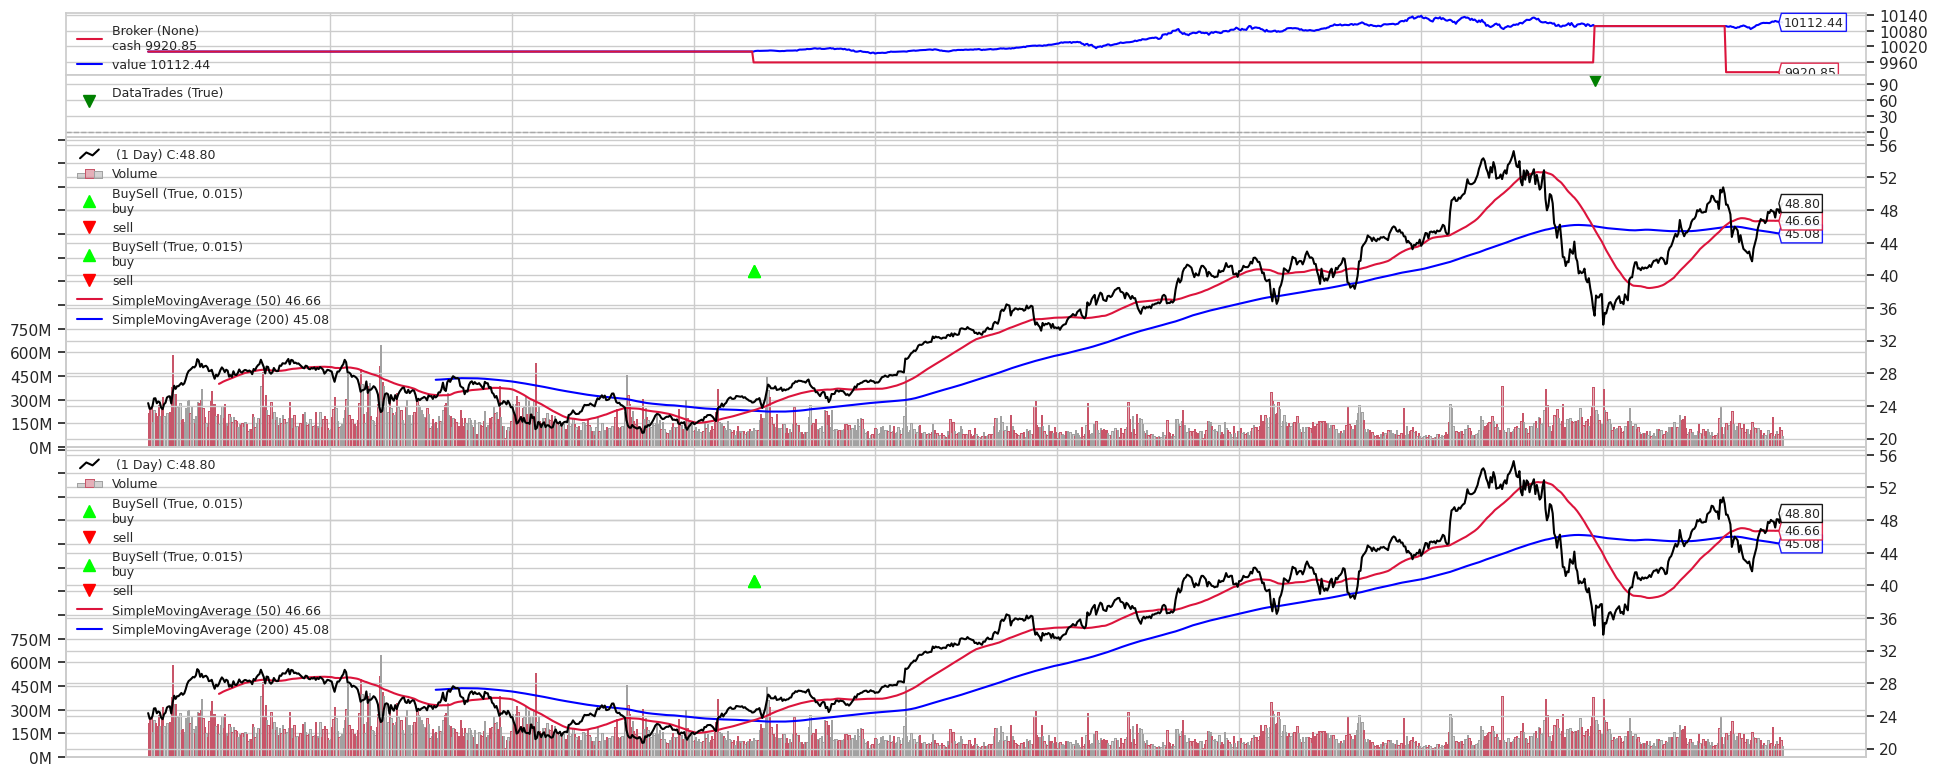

[[<Figure size 2000x800 with 6 Axes>]]

In [118]:
cerebro.plot(iplot=False)

In [119]:


# cerebro.plot(iplot=False, style='candlestick')[0][0].savefig('backtrader_plot.png')
# # Mostrar el gráfico guardado
# from IPython.display import Image
# display(Image(filename='backtrader_plot.png'))

In [120]:
strategy = cerebro.run()[0] 
df = pd.DataFrame(strategy.values, columns=['Portfolio_Value'])
df['Strategy_Returns'] = df['Portfolio_Value'].pct_change()

In [121]:
total_return = (df['Strategy_Returns'] + 1).prod() - 1
annualized_return = (1 + total_return) ** (252 / len(df)) - 1  # Ajustado por 252 días de trading anuales
print(f'Rendimiento Total: {total_return:.2%}')
print(f'Rendimiento Anualizado: {annualized_return:.2%}')

Rendimiento Total: 1.12%
Rendimiento Anualizado: 0.27%


In [122]:
# Ratio de Sharpe
risk_free_rate = 0.01  # Supongamos que la tasa libre de riesgo es del 1%
excess_return = df['Strategy_Returns'].mean() - (risk_free_rate / 252)  # Retornos en exceso sobre la tasa libre de riesgo
sharpe_ratio = excess_return / df['Strategy_Returns'].std()
print(f'Ratio de Sharpe: {sharpe_ratio:.2f}')

Ratio de Sharpe: -0.13


In [123]:
# Máximo Drawdown
df['Cumulative_Returns'] = (df['Strategy_Returns'] + 1).cumprod()
df['Peak'] = df['Cumulative_Returns'].cummax()
df['Drawdown'] = (df['Cumulative_Returns'] - df['Peak']) / df['Peak']
max_drawdown = df['Drawdown'].min()
print(f'Máximo Drawdown: {max_drawdown:.2%}')

Máximo Drawdown: -0.50%


In [124]:
# Ratio de Ganancias/Pérdidas
winning_trades = df[df['Strategy_Returns'] > 0]['Strategy_Returns'].count()
losing_trades = df[df['Strategy_Returns'] <= 0]['Strategy_Returns'].count()
win_loss_ratio = winning_trades / losing_trades if losing_trades != 0 else np.inf
ganancia_media = df[df['Strategy_Returns'] > 0]['Strategy_Returns'].mean()
perdida_media = df[df['Strategy_Returns'] <= 0]['Strategy_Returns'].mean()
print(f'Operaciones Ganadoras: {winning_trades} -- Ganancia Media: {ganancia_media:.2%}')
print(f'Operaciones Perdedoras: {losing_trades} -- Pérdida Media: {perdida_media:.2%}')
print(f'Ratio Ganancias/Pérdidas: {win_loss_ratio:.2f}')


Operaciones Ganadoras: 355 -- Ganancia Media: 0.02%
Operaciones Perdedoras: 677 -- Pérdida Media: -0.01%
Ratio Ganancias/Pérdidas: 0.52


In [125]:
df['Drawdown'].notna().any()

True

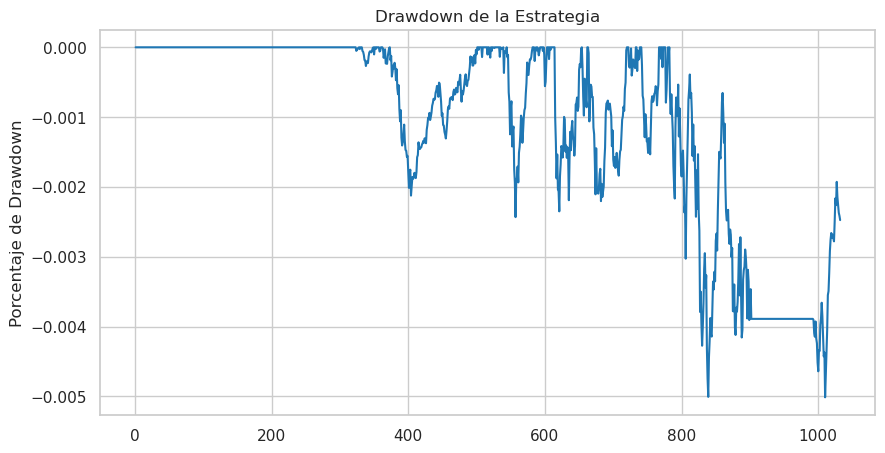

In [126]:
# Visualización de Resultados

# Graficar el Drawdown
plt.figure(figsize=(10, 5))
df['Drawdown'].plot(label='Drawdown')
plt.title('Drawdown de la Estrategia')
plt.ylabel('Porcentaje de Drawdown')
plt.show()
